In [44]:
#项目：电影受欢迎程度调查
#介绍：
#电影受欢迎程度收哪些因素的影响？比如上映月份，上映年份，播放时长？本次数据分析通过对以上的数据进行分析得到结论
#1、导入数据
#2、分析相关列信息
#3、整理数据
#4、列出图表
#5、得出结论

In [45]:
import pandas as pd
df = pd.read_csv('tmdb-movies.csv')
%matplotlib inline

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [47]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [48]:
#df.head()

In [49]:
df.duplicated().sum()#计算重复行数据


1

In [50]:
df = df.drop_duplicates()#清除重复行
df.duplicated().sum()#计算重复行数据

0

In [51]:
#清理预算为0的数据
#df.isnull().any()
df.describe()

df.query('budget > 0 and budget_adj > 0').describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5169.000000,5169.000000,5.169000e+03,5.169000e+03,5169.000000,5169.000000,5169.000000,5169.000000,5.169000e+03,5.169000e+03
mean,45513.725479,0.992400,3.073958e+07,8.029101e+07,107.096150,408.651190,6.032308,2001.251112,3.688907e+07,1.021953e+08
std,72730.345078,1.329262,3.890441e+07,1.594865e+08,22.810038,788.314712,0.884125,11.776443,4.196096e+07,1.959194e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,8840.000000,0.347958,6.000000e+06,0.000000e+00,93.000000,35.000000,5.500000,1996.000000,8.102293e+06,0.000000e+00
50%,13008.000000,0.624024,1.700000e+07,2.100156e+07,103.000000,122.000000,6.100000,2005.000000,2.271505e+07,2.863167e+07
75%,44943.000000,1.152417,4.000000e+07,8.945676e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134196e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002166DA295C0>,
      dtype=object)

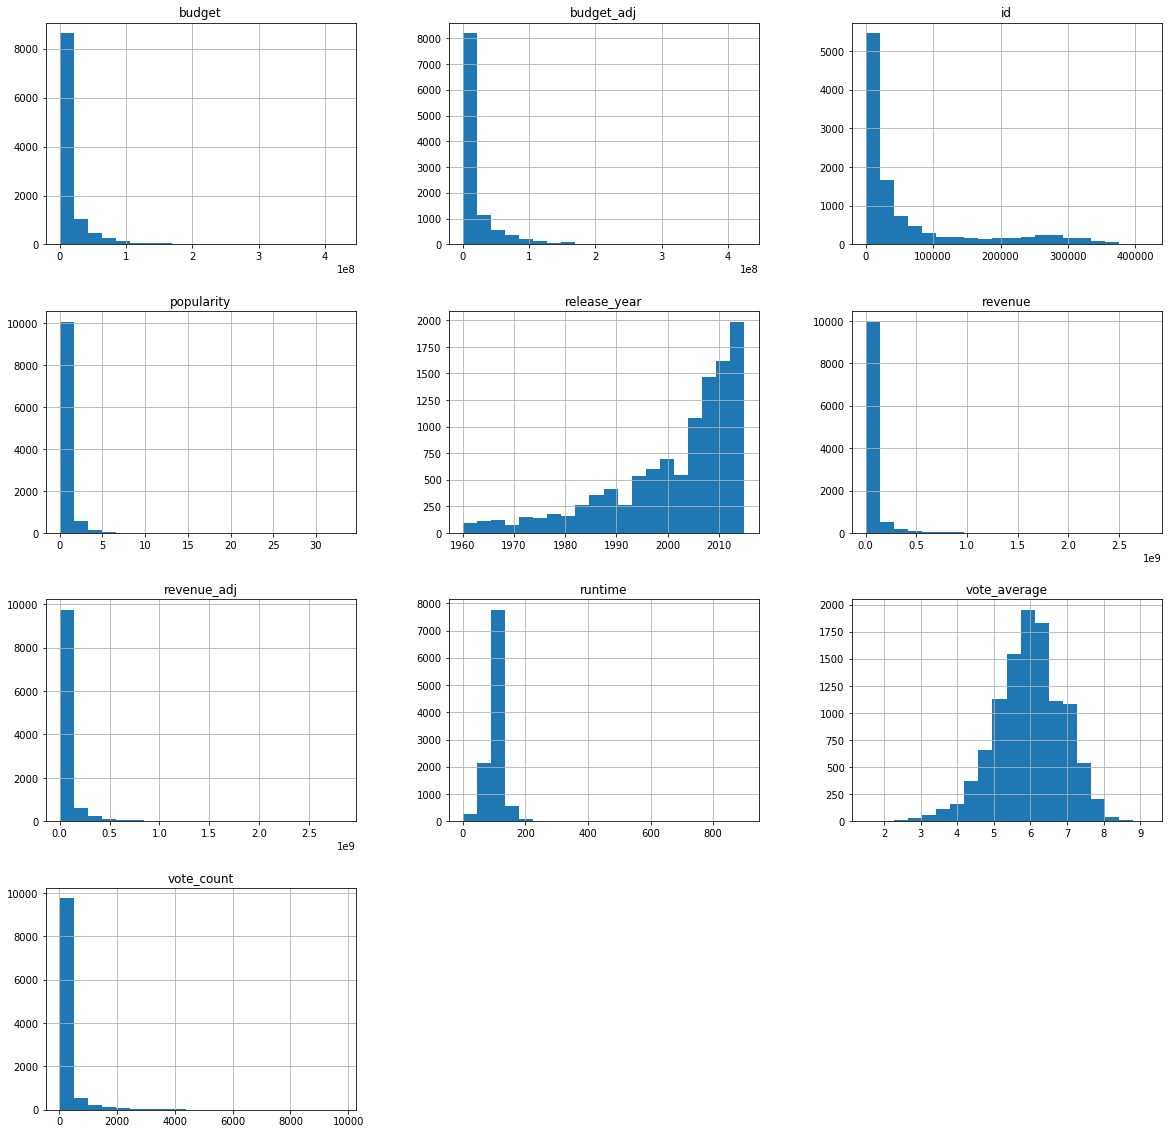

In [52]:
df.hist(bins=20,figsize=(20,20))

In [53]:
#预算，预算调整的柱状图

In [54]:
#type(df['release_date'][0])
#df['release_date']#截取月份
df['release_date_month'] = df['release_date'].str.extract('(\d+)').astype(int)

D:\anacoda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


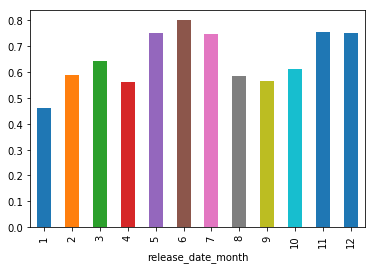

In [55]:
#df.plot(x='release_date_month',y='popularity',kind='scatter')
df.groupby('release_date_month')['popularity'].mean().plot(kind='bar')#按月份分组，与欢迎程度之间的柱状图展现

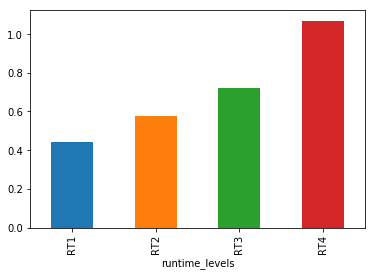

In [56]:
#按照播放时长来进行分类
runtime_edges = [ 0,93,103 ,117 ,540 ] # 用刚才计算的五个值填充这个列表
runtime_names = [ 'RT1','RT2','RT3' ,'RT4' ] # 对每个播放时长水平类别进行命名
df['runtime_levels'] = pd.cut(df['runtime'], runtime_edges, labels=runtime_names)
df.head()
df.groupby('runtime_levels')['popularity'].mean().plot(kind='bar')#按播放时长分组，计算bar图片

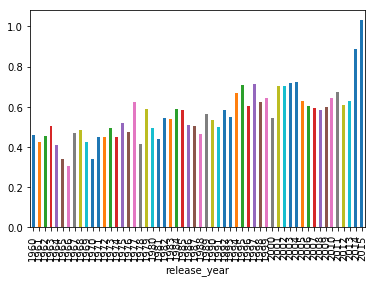

In [57]:
#按照上映年份来进行播放
df.groupby('release_year')['popularity'].mean().plot(kind='bar')#按播放时长分组，计算bar图片


In [58]:
#结论
#1、每个月份的上映影片，受欢迎程度不一样，一般而言暑期档（5，6，7），年末（11，12）月份受欢迎程度较高。
#2、电影播放时长也对影片的受欢迎程度有很大影响，一般而言，播放时长越长，受欢迎程度越高。
#3、上映年份对于受欢迎程度也有呈先很大的影响，年份越靠近当前时间，受欢迎程度是逐步上升的。